#

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#Prepare/collect data

In [5]:
import os

path = os.listdir('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [7]:
!pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        if img is not None:  # Check if the image was read successfully
            img = cv2.resize(img, (200,200))
            X.append(img)
            Y.append(classes[cls])

In [11]:
X = np.array(X)
Y = np.array(Y)

In [13]:
np.unique(Y)

array([0, 1])

In [15]:
pd.Series(Y).value_counts()

1    2475
0     395
Name: count, dtype: int64

In [17]:
Y.shape

(2870,)

In [19]:
X.shape

(2870, 200, 200)

In [21]:
#Visualize data

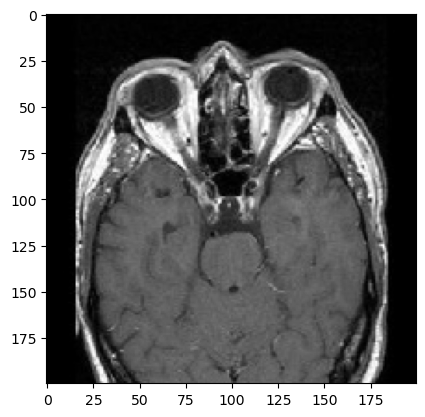

In [23]:
plt.imshow(X[0], cmap='gray')

In [25]:
#Prepare data

In [27]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

In [29]:
#Split Data

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [33]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

In [35]:
ytrain.shape, ytest.shape

((2296,), (574,))

In [37]:
#Feature Scaling

In [39]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [41]:
#Feature Selection: PCA

In [43]:
from sklearn.decomposition import PCA

In [45]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(2296, 40000) (574, 40000)


In [47]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

In [49]:
#Train Model

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [54]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [56]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [58]:
#Evaluation

In [60]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9425087108013938


In [62]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9804006968641115
Testing Score: 0.9442508710801394


In [64]:
#Prediction

In [66]:

pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([  9,  32,  37,  76, 125, 129, 140, 146, 149, 151, 166, 174, 181,
        187, 203, 242, 313, 338, 356, 375, 423, 438, 441, 448, 453, 466,
        474, 476, 501, 512, 513, 522], dtype=int64),)

In [68]:
pred[36]

1

In [70]:
ytest[36]

1

In [72]:
#TEST MODEL

In [74]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

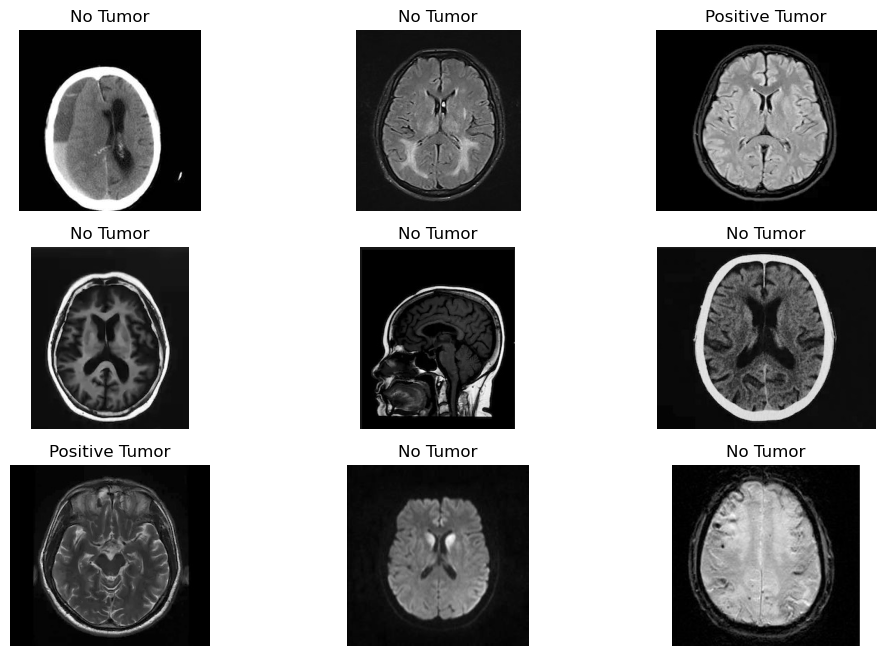

In [76]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/Testing/')
c=1
for i in os.listdir('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

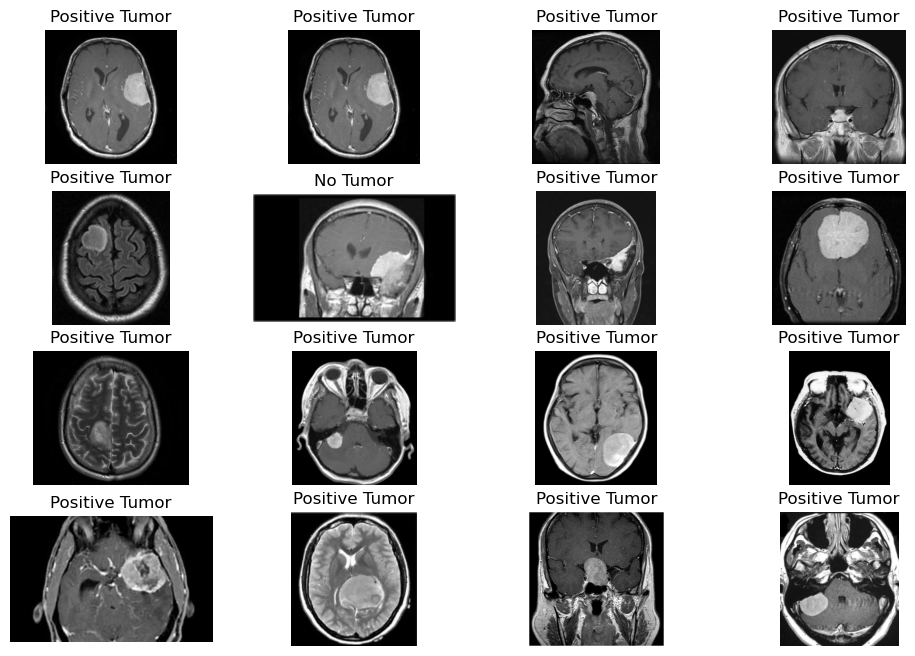

In [78]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/Testing/')
c=1
for i in os.listdir('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

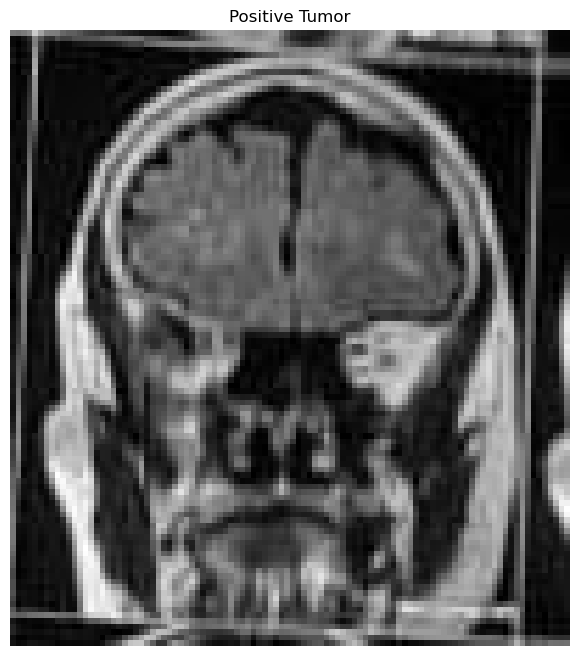

In [80]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/manual/')
c=1
for i in os.listdir('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/manual/')[:1]:
    plt.subplot(1,1,c)
    
    img = cv2.imread('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/manual/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

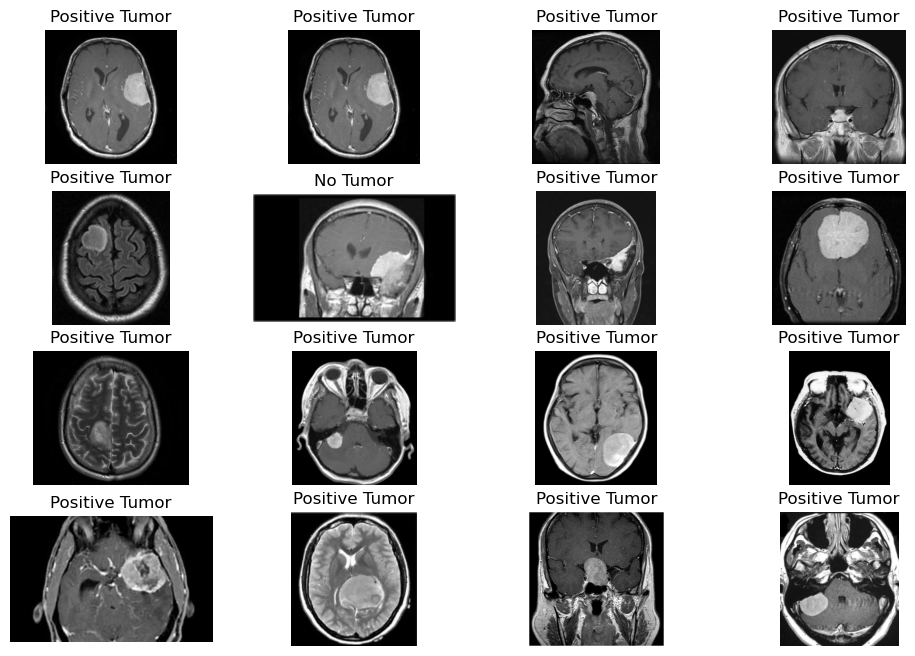

In [82]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/Testing/')
c=1
for i in os.listdir('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/manas/OneDrive/Desktop/Brain_Tumor/Project/brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1